# Ch1 Building Scrapers

- To give you some idea of infrastructure required tp get information to your browser, let's use the following example. Alice owns a web server. Bob uses a desktop computer, which is trying to connect to Alice's server. When one machine wants to talk to another machine, something like the following exchange takes place:

1. Bob's computer sends along a stream of 1 and 0 bits, indicated by high and low voltages on a wire. These bits form some infomation, contaoining a header and body. The header contains an immediate destination of his local router's MAC address, with a final destination of Alice's IP address. The body contains his request fpr Alice's server application.
2. Bob's local router receives all these 1's and 0's and interprets them as a packet, from Bob's own MAC address, and destined for Alice's IP address. His router stamps its own IP address on the packet as the "from" IP address, and sends it off across the Internet.
3. Bob's packet traverses several intermediary server, which direct his packet toward the correct physical wired path, on to Alice's server. 
4. Alice's server receives the packet, at her IP address.
5. Alice's server reads the packet port destination (almost always port 80 for web packet data, where the IP address is the "street address"), in the hearder, and passes it off to the appropriate application - the web server application.
6. The web server application receives a stream of data from the server processor. This data says something like:
  - This is a GET request
  - The following file is requested :index.html
7. The web server locates the correct HTML file, bundles it up into a new packet to send to Bob, and sends it through to its local router, for transport back to Bob's machine, through the same process.

In [1]:
from urllib.request import urlopen
html = urlopen("http://pythonscraping.com/pages/page1.html")

In [2]:
print(html.read())

b'<html>\n<head>\n<title>A Useful Page</title>\n</head>\n<body>\n<h1>An Interesting Title</h1>\n<div>\nLorem ipsum dolor sit amet, consectetur adipisicing elit, sed do eiusmod tempor incididunt ut labore et dolore magna aliqua. Ut enim ad minim veniam, quis nostrud exercitation ullamco laboris nisi ut aliquip ex ea commodo consequat. Duis aute irure dolor in reprehenderit in voluptate velit esse cillum dolore eu fugiat nulla pariatur. Excepteur sint occaecat cupidatat non proident, sunt in culpa qui officia deserunt mollit anim id est laborum.\n</div>\n</body>\n</html>\n'


- This can only read single HTML file that we've requested(yet), not like using brower which can recognize when we click the link.

## Beautiful Soup

In [4]:
from urllib.request import urlopen
from bs4 import BeautifulSoup
html = urlopen("http://pythonscraping.com/pages/page1.html")
bsObj = BeautifulSoup(html.read(), "lxml")
print(bsObj.h1)

<h1>An Interesting Title</h1>


- As in the example before, we are importing the urlopen library and calling html.read() in order to get the HTML content of the page. This HTML content is then transformed into a BeautifulSoup object, with the following structure:

In [5]:
bsObj.html.body.h1

<h1>An Interesting Title</h1>

In [6]:
bsObj.html.h1

<h1>An Interesting Title</h1>

In [7]:
html = urlopen("http://pythonscraping.com/pages/page1.html")

- There are two main things that can go wrong in this line:

- The page is not found on the server (or there was some error in retrieving it)
- The server is not found

Could be
- "404 Page Not Found"
- "55 Internal Server Error"
- or "HTTPError"

In [ ]:
# handle like
try:
    html = urlopen()
except HTTPError as e:
    print(e)
else:
    

- If server is not found at all, urloepn returns a None object. This object is analogous to null in other programming languages.

In [ ]:
if html is None:
    print("URL is not found")
else:
    # program continues

- How about if there is not the tag that we want?

In [ ]:
print(bsObj.nonExistingTag.someTag)


we get
- AttributeError: 'NoneType' object has no attribute 'someTag'

In [ ]:
# guarding
try:
    badContent = bsObj.nonExistingTag.anotherTag
except AttributeError as e:
    print("Tag was not found")
else:
    if badContent == None:
        print("Tag was not found")
    else:
        print(badContent)

In [ ]:
from urllib.request import urlopen
from urllib.error import HTTPError
from bs4 import BeautifulSoup

def getTitle(url):
    try:
        html = urlopen(url)
    except HTTPError as e:
        return None
    try:
        bsObj = BeautifulSoup(html.read(), "lxml")
        title = bsObj.body.h1
    except AttributeError as e:
        return None
    return title

title = getTitle("http://www.pythonscraping.com/pages/page1.html")
if title == None:
    print("Title could not be found")
else:
    print(title)

# Ch2  Advanced HTML Parsing

- Class Selector

In [10]:
from urllib.request import urlopen
from bs4 import BeautifulSoup
html = urlopen("http://www.pythonscraping.com/pages/warandpeace.html")
bsObj = BeautifulSoup(html, "lxml")
nameList = bsObj.find_all("span", {"class":"green"})
for name in nameList:
    print(name.get_text())

Anna
Pavlovna Scherer
Empress Marya
Fedorovna
Prince Vasili Kuragin
Anna Pavlovna
St. Petersburg
the prince
Anna Pavlovna
Anna Pavlovna
the prince
the prince
the prince
Prince Vasili
Anna Pavlovna
Anna Pavlovna
the prince
Wintzingerode
King of Prussia
le Vicomte de Mortemart
Montmorencys
Rohans
Abbe Morio
the Emperor
the prince
Prince Vasili
Dowager Empress Marya Fedorovna
the baron
Anna Pavlovna
the Empress
the Empress
Anna Pavlovna's
Her Majesty
Baron
Funke
The prince
Anna
Pavlovna
the Empress
The prince
Anatole
the prince
The prince
Anna
Pavlovna
Anna Pavlovna


- find_all(tag, attributes, recursive, text, limit, keywords)
- find(tag, attributes, recursive, text, keywords)

- .find_all({"h1", "h2", "h3", "h4, "h5", "h6"})

- .find_all("span", {"class":"green", "class":"red"})

- The recursive argument is a boolean. How deeply into the document do you want to go? If recursion is set to True, the find_all function looks into children, and children's children, for tags that match your parameters. If it is false, it will look only at the top-level tags in your document. By default, find_all works recursively (recursive is set to True); it's generally a good idea to leave this as is, unless your really know what your need to do and performance is an issue.

In [11]:
nameList  = bsObj.find_all(text="the prince")
print(len(nameList))

7


In [12]:
nameList

['the prince',
 'the prince',
 'the prince',
 'the prince',
 'the prince',
 'the prince',
 'the prince']

- Keyword argument to get the tages that contain a particular atrribute.

In [13]:
allText = bsObj.find_all(id="text")
print(allText[0].get_text())


"Well, Prince, so Genoa and Lucca are now just family estates of the
Buonapartes. But I warn you, if you don't tell me that this means war,
if you still try to defend the infamies and horrors perpetrated by
that Antichrist- I really believe he is Antichrist- I will have
nothing more to do with you and you are no longer my friend, no longer
my 'faithful slave,' as you call yourself! But how do you do? I see
I have frightened you- sit down and tell me all the news."

It was in July, 1805, and the speaker was the well-known Anna
Pavlovna Scherer, maid of honor and favorite of the Empress Marya
Fedorovna. With these words she greeted Prince Vasili Kuragin, a man
of high rank and importance, who was the first to arrive at her
reception. Anna Pavlovna had had a cough for some days. She was, as
she said, suffering from la grippe; grippe being then a new word in
St. Petersburg, used only by the elite.

All her invitations without exception, written in French, and
delivered by a scarlet-liveri

> all this keyword argument can be done with regular expression and lambda expression
- and use class\_ for class attribute

- 4 Objects in bs4

1. BeautifulSoup
2. Tag
3. BavigableString
4. Comment

- children and descendents

In [ ]:
from urllib.request import urlopen
from bs4 import BeautifulSoup
html = urlopen("http://www.pythonscraping.com/pages/page3.html")
bsObj = BeautifulSoup(html)

for child in bsObj.find("table", {"id":"giftList"}).children:
    print(child)

** Dealing with siblings**

In [ ]:
from urllib.request import urlopen
from bs4 import BeautifulSoup
html = urlopen("")
bsObj = BeautifulSoup(html, "lxml")

for sibling in bsObj.find("table", {"id":"giftList"}).tr.next_siblings:
    print(sibling)

- So, by selecting the title orw and calling next_siblings, we can select all the rows in the table, without selecting the title row itself.

- previous_siblings

**Dealing with your parents**

In [15]:
from urllib.request import urlopen
from bs4 import BeautifulSoup
html = urlopen("http://www.pythonscraping.com/pages/page3.html")
bsObj = BeautifulSoup(html, "lxml")

print(bsObj.find("img", {"src":"../img/gifts/img1.jpg"}).parent.previous_sibling.get_text())


$15.00



## Regular expression and BeautifulSoup

In [ ]:
from urllib.request import urlopen
from bs4 import BeautifulSoup
import re

html = urlopen("http://www.pythonscraping.com/pages/page3.html")
bsObj = BeautifulSoup(html, "lxml")

images = bsObj.find_all("img", {"src":re.compile("\.\.\/img/gifts/img.*\.jpg")})
for image in images:
    print(image["src"])

### Accessing Attributes

- myImgTag.attrs['src']

## Lambda Expressions

In [ ]:
soup.find_all(lambda tag: len(tag.attrs) == 2)

- we got
```html
    <div class="body" id="content"></div>
    <span style="color:red" class="title"></span>
```

# Ch3 : Starting to Crawl

In [1]:
from urllib.request import urlopen
from bs4 import BeautifulSoup

html = urlopen("http://en.wikipedia.org/wiki/Kevin_Bacon")
bsObj = BeautifulSoup(html, 'lxml')
for link in bsObj.find_all("a"):
    if 'href' in link.attrs:
        print(link.attrs['href'])

/wiki/Wikipedia:Protection_policy#semi
#mw-head
#p-search
/wiki/Kevin_Bacon_(disambiguation)
/wiki/File:Kevin_Bacon_SDCC_2014.jpg
/wiki/San_Diego_Comic-Con
/wiki/Philadelphia
/wiki/Pennsylvania
/wiki/Kyra_Sedgwick
/wiki/Sosie_Bacon
/wiki/Edmund_Bacon_(architect)
/wiki/Michael_Bacon_(musician)
http://baconbros.com/
#cite_note-1
#cite_note-actor-2
/wiki/Footloose_(1984_film)
/wiki/JFK_(film)
/wiki/A_Few_Good_Men
/wiki/Apollo_13_(film)
/wiki/Mystic_River_(film)
/wiki/Sleepers
/wiki/The_Woodsman_(2004_film)
/wiki/Fox_Broadcasting_Company
/wiki/The_Following
/wiki/HBO
/wiki/Taking_Chance
/wiki/Golden_Globe_Award
/wiki/Screen_Actors_Guild_Award
/wiki/Primetime_Emmy_Award
/wiki/The_Guardian
/wiki/Academy_Award
#cite_note-3
/wiki/Hollywood_Walk_of_Fame
#cite_note-4
/wiki/Social_networks
/wiki/Six_Degrees_of_Kevin_Bacon
/wiki/SixDegrees.org
#cite_note-walk-5
#Early_life_and_education
#Acting_career
#Early_work
#1980s
#1990s
#2000s
#2010s
#Advertising_work
#Personal_life
#Six_Degrees_of_Kevin_Ba

- In fact, wikipedia is full of sidebar, footer, and header links that appear on every page, along with links to the category pages, talk pages, and other pages that do not contain different articles.

the links that point to article pages all ahve three things in common:
- The reside within the div with id set to bodyContent
- The URLs do not contain semicolons
- The URLs begin with /wiki/

In [2]:
from urllib.request import urlopen
from bs4 import BeautifulSoup
import re


html = urlopen("http://en.wikipedia.org/wiki/Kevin_Bacon")
bsObj = BeautifulSoup(html, 'lxml')

for link in bsObj.find("div", {"id":"bodyContent"}).find_all("a", href=re.compile("^(/wiki/)((?!:).)*$")):
    if 'href' in link.attrs:
        print(link.attrs['href'])

/wiki/Kevin_Bacon_(disambiguation)
/wiki/San_Diego_Comic-Con
/wiki/Philadelphia
/wiki/Pennsylvania
/wiki/Kyra_Sedgwick
/wiki/Sosie_Bacon
/wiki/Edmund_Bacon_(architect)
/wiki/Michael_Bacon_(musician)
/wiki/Footloose_(1984_film)
/wiki/JFK_(film)
/wiki/A_Few_Good_Men
/wiki/Apollo_13_(film)
/wiki/Mystic_River_(film)
/wiki/Sleepers
/wiki/The_Woodsman_(2004_film)
/wiki/Fox_Broadcasting_Company
/wiki/The_Following
/wiki/HBO
/wiki/Taking_Chance
/wiki/Golden_Globe_Award
/wiki/Screen_Actors_Guild_Award
/wiki/Primetime_Emmy_Award
/wiki/The_Guardian
/wiki/Academy_Award
/wiki/Hollywood_Walk_of_Fame
/wiki/Social_networks
/wiki/Six_Degrees_of_Kevin_Bacon
/wiki/SixDegrees.org
/wiki/Philadelphia
/wiki/Edmund_Bacon_(architect)
/wiki/Pennsylvania_Governor%27s_School_for_the_Arts
/wiki/Bucknell_University
/wiki/Glory_Van_Scott
/wiki/Circle_in_the_Square
/wiki/Nancy_Mills
/wiki/Cosmopolitan_(magazine)
/wiki/Fraternities_and_sororities
/wiki/Animal_House
/wiki/Search_for_Tomorrow
/wiki/Guiding_Light
/wiki/F

- Of course, having a script that finds all article links in one, hardcoded Wikipedia article, while interesting, is fairly useless in pratice. We need to be able to take this code and transform it into something more like the following:

- A single function, getLinks, that takes in a Wikipedia article URL of the form /wiki/[Article_Name] and returns a list of all linked article URLs in the same form.
- A main function that calls getLinks with some starting article, chooses a random article link from the returned list, and calls getLinks again, until we  stop the program or until there are no article links found on the new page.

In [5]:
from urllib.request import urlopen
from bs4 import BeautifulSoup
import datetime
import random
import re

def getLinks(articleUrl):
    html = urlopen("http://en.wikipedia.org" + articleUrl)
    bsObj = BeautifulSoup(html, 'lxml')
    return bsObj.find("div", {"id":"bodyContent"}).find_all("a", href=re.compile("^(/wiki/)((?!:).)*$"))

links = getLinks("/wiki/Kevin_Bacon")
while len(links) > 0:
    newArticle = links[random.randint(0, len(links)-1)].attrs['href']
    print(newArticle)
    links = getLinks(newArticle)
    

/wiki/Teen_Choice_Awards
/wiki/Melodi_Grand_Prix
/wiki/Germany_in_the_Eurovision_Song_Contest
/wiki/Eurovision_Song_Contest_1963
/wiki/L%27amour_s%27en_va
/wiki/Toi,_la_musique_et_moi
/wiki/Mariza_Koch
/wiki/Alpha_TV
/wiki/Nickelodeon_Plus
/wiki/ANT1_Satellite
/wiki/HD_TV
/wiki/Field_(video)
/wiki/Field_dominance
/wiki/Field_(video)
/wiki/Interlaced_video
/wiki/Television_transmitter
/wiki/Television_network
/wiki/Erna_Schneider_Hoover
/wiki/Photophone
/wiki/Bell_Telephone_Company
/wiki/The_Telephone_Cases
/wiki/Bell_Telephone_Company
/wiki/Massachusetts
/wiki/Reservoir
/wiki/Bone_tool
/wiki/Timeline_of_human_prehistory
/wiki/Grime%27s_Graves
/wiki/List_of_oldest_buildings
/wiki/Pakistan
/wiki/Nation-state
/wiki/Ethnic_groups_in_Central_America
/wiki/Ethnic_bioweapon
/wiki/Holocaust_denial
/wiki/Robert_Faurisson
/wiki/Virtual_International_Authority_File
/wiki/Barcelona
/wiki/Igualada
/wiki/Sant_Jaume_de_Frontany%C3%A0
/wiki/Gallifa
/wiki/Sentmenat
/wiki/Or%C3%ADs
/wiki/Santpedor
/wiki

/wiki/Neoliberalism
/wiki/Regulatory_capitalism
/wiki/Capitalism
/wiki/Harvard_University_Press
/wiki/Harvard_Faculty_of_Arts_and_Sciences
/wiki/Harvard_Graduate_School_of_Arts_and_Sciences
/wiki/Harvard_School_of_Public_Health
/wiki/Harvard_Division_of_Continuing_Education
/wiki/John_Harvard_(clergyman)
/wiki/President_and_Fellows_of_Harvard_College
/wiki/Leverett_House
/wiki/Center_for_the_History_of_Medicine
/wiki/New_England_Journal_of_Medicine
/wiki/PubMed_Identifier
/wiki/Teleophthalmology
/wiki/PubMed_Identifier
/wiki/PubMed_Central
/wiki/XML
/wiki/Maxthon
/wiki/Charles_River_Ventures
/wiki/Aveksa
/wiki/Identity_and_access_management
/wiki/Loyalty_card
/wiki/Canada
/wiki/Sri_Lanka
/wiki/Sugar_production_in_Sri_Lanka
/wiki/Residual_sugar
/wiki/German_wine_classification
/wiki/Reserve_wine
/wiki/Rioja_wine
/wiki/Bullas_(DO)
/wiki/Los_Palacios_(Vino_de_la_Tierra)
/wiki/Ucl%C3%A9s_(DO)
/wiki/Monterrei_(DO)
/wiki/Sierra_de_Alcaraz_(Vino_de_la_Tierra)
/wiki/Catalonia
/wiki/Ra%C3%BCl_R

/wiki/Chemical_element
/wiki/Johan_Gadolin
/wiki/Nordic_countries
/wiki/Sami_languages
/wiki/Kildin_Sami_language
/wiki/Voiceless_dental_and_alveolar_stops#Alveolar
/wiki/Lateral_consonant
/wiki/Voiceless_retroflex_approximant
/wiki/Voiceless_bilabial_nasal
/wiki/Voiced_linguolabial_fricative
/wiki/Dental_ejective_affricate
/wiki/Near-close_central_rounded_vowel
/wiki/International_Phonetic_Alphabet
/wiki/Voiceless_velar_lateral_affricate
/wiki/International_Phonetic_Alphabet
/wiki/Velar_nasal
/wiki/Voice_(phonetics)
/wiki/Alveolar_consonant
/wiki/Denti-alveolar_consonant
/wiki/Voiceless_retroflex_fricative
/wiki/Nasal_consonant
/wiki/Alveolar_lateral_ejective_affricate
/wiki/Voiceless_palatal_approximant
/wiki/Uvular%E2%80%93epiglottal_consonant
/wiki/Uvular_consonant
/wiki/Voiced_uvular_stop
/wiki/Cursive_forms_of_the_International_Phonetic_Alphabet
/wiki/Close-mid_front_rounded_vowel
/wiki/International_Phonetic_Alphabet_chart
/wiki/Voiceless_palatal_nasal
/wiki/Cursive_forms_of_the

/wiki/Marine_Corps_Base_Quantico
/wiki/National_Register_of_Historic_Places_listings_in_Fauquier_County,_Virginia
/wiki/Marshall,_Virginia
/wiki/Liberty,_Fauquier_County,_Virginia
/wiki/Virginia
/wiki/Democratic_Party_of_Virginia
/wiki/David_Allen_Smalley
/wiki/Wyoming_Democratic_Party
/wiki/Ron_Brown_(U.S._politician)
/wiki/Southern_Democrats
/wiki/Personal_Responsibility_and_Work_Opportunity_Act
/wiki/Feminist
/wiki/Feminist_effects_on_society
/wiki/Feminist_views_on_pornography
/wiki/Motion_picture_content_rating_system#Colombia
/wiki/Television_content_rating_systems
/wiki/Australian_Communications_and_Media_Authority
/wiki/Optical_communication
/wiki/Morse_code
/wiki/Albanian_Braille
/wiki/Night_writing
/wiki/Unicode_range
/wiki/Arabic_alphabet
/wiki/Eveyla_Akuru
/wiki/Pahawh_Hmong
/wiki/Vithkuqi_alphabet
/wiki/N%C4%81gar%C4%AB_script
/wiki/Brahmi_script
/wiki/Ashoka
/wiki/Buddhist_philosophy
/wiki/Mudras
/wiki/Kiss
/wiki/Eucharist
/wiki/Ethiopian_Orthodox_Tewahedo_Church
/wiki/Th

/wiki/John_Virginius_Bennes
/wiki/National_Register_of_Historic_Places
/wiki/National_Institute_of_Historic_and_Artistic_Heritage
/wiki/Brazil
/wiki/G20
/wiki/Moon_Jae-in
/wiki/Canada
/wiki/Digital_object_identifier
/wiki/ISO/TR_11941
/wiki/ISO/IEC_7813
/wiki/Computer_Graphics_Metafile
/wiki/ISO_11784_%26_11785
/wiki/Cloud_Infrastructure_Management_Interface
/wiki/ANSI_escape_code
/wiki/Code_page_878
/wiki/Code_page_772
/wiki/MacRomanian_encoding
/wiki/Kamenicky_encoding
/wiki/TACE16
/wiki/EBCDIC_1144
/wiki/Start_of_heading
/wiki/EBCDIC_285
/wiki/Code_page_861
/wiki/%CE%95
/wiki/Lambda
/wiki/Stephen_Wolfram
/wiki/Cellular_automaton
/wiki/ILabs
/wiki/Transhumanism
/wiki/Libertarian_transhumanism
/wiki/Illiberal_democracy
/wiki/Steven_Levitsky
/wiki/International_Standard_Book_Number
/wiki/Bookcase
/wiki/Yingzao_Fashi
/wiki/Bracket_(architecture)
/wiki/Pergola
/wiki/Burdei
/wiki/History_of_hide_materials
/wiki/Racloir
/wiki/Prehistoric_technology
/wiki/Prehistoric_music
/wiki/Music_festi

/wiki/William_Murdoch#Steam_powered_locomotion
/wiki/Aniline_dye
/wiki/4-chloroaniline
/wiki/Royal_Society_of_Chemistry
/wiki/Faraday_Discussions
/wiki/Fellow_of_the_Royal_Society_of_Chemistry
/wiki/CrystEngCommunity
/wiki/Harry_Kroto
/wiki/Steven_V._Ley
/wiki/IUPAC
/wiki/Global_warming
/wiki/Bibcode
/wiki/Monthly_Notices_of_the_Royal_Astronomical_Society
/wiki/Astronomical_Society_of_London
/wiki/Mantle_convection
/wiki/Lithosphere
/wiki/Asthenosphere
/wiki/Inner_core
/wiki/Inner_core#Discovery
/wiki/Digital_object_identifier
/wiki/ISO_20022
/wiki/ISO_7001
/wiki/ISO_31-13
/wiki/Fuel_oil
/wiki/International_Standard_Audiovisual_Number
/wiki/ISO_216
/wiki/ISO_8601
/wiki/PDF417
/wiki/ISO/IEC_9995
/wiki/Caps_lock
/wiki/Arrow_keys
/wiki/Caps_lock
/wiki/Function_key
/wiki/HP_9800_series
/wiki/BASIC
/wiki/IBM_BASIC
/wiki/Software_developer
/wiki/Computer_Sciences_Corporation
/wiki/Dominic_Barton
/wiki/Master_of_Philosophy
/wiki/Postgraduate_diploma
/wiki/Belgium
/wiki/Poland
/wiki/Polish_lan

/wiki/List_of_urban_planners
/wiki/Texcoco_(altepetl)
/wiki/List_of_rulers_of_Texcoco
/wiki/Aztec_calendar
/wiki/Epoch_(reference_date)
/wiki/Ephemeris
/wiki/Circular_orbit
/wiki/Escape_orbit
/wiki/Lissajous_orbit
/wiki/Two-line_element_set
/wiki/Orbit_equation
/wiki/Orbit_of_the_Moon
/wiki/Specific_relative_angular_momentum
/wiki/Mean_longitude
/wiki/Longitude_of_the_ascending_node
/wiki/Parking_orbit
/wiki/Gravity_turn
/wiki/Open-loop_controller
/wiki/Beam_engine
/wiki/Murray%27s_Hypocycloidal_Engine
/wiki/Glossary_of_steam_locomotive_components
/wiki/Nicolas-Joseph_Cugnot#The_first_self-propelled_vehicle
/wiki/Cutoff_(steam_engine)
/wiki/Safety_valve
/wiki/Oxford_University_Press
/wiki/Book_History
/wiki/Literary_agent
/wiki/Writer%27s_Market
/wiki/Literary_agent
/wiki/Richard_Curtis_(literary_agent)
/wiki/Mariner_Books
/wiki/The_Return_of_the_King
/wiki/J._R._R._Tolkien%27s_Riders_of_Rohan
/wiki/Works_inspired_by_J._R._R._Tolkien
/wiki/Orson_Scott_Card
/wiki/Same-sex_relationship
/

URLError: <urlopen error [Errno -3] Temporary failure in name resolution>

- For the curious, the Python pseudorandom number generator is powered by the Mersenne Twister algorithm.

- The general approach to an exhaustive site crawl is to start with a top-leve page(such as the home page), and search for a list of all internal links on that page. Every one of those links is then crawled, and additional lists of links are found on each one of them, triggering another round of crawling.

- Clearly this is a situation that can blow up very quickly. If every page has 10 internal links, and a website is five pages deep, then the number of pages you need to crawl is 10^5, or 100,000pages, before you can be sure that you've exhaustively covered the website. Strangely enough, while "5 pages deep and 10 internal links per page" are fairly typical dimensions for a website, there are very few websites with 100,000 or more pages. The reason, of course, is that the vast majority of internal links are duplicates.

- In order to avoid crawling the same page twice, it is extremely important that all internal links discovered are formatted consistently, and kept in a running list for easy lookups, while the program is running. Only links that are "new" should be crawled and searched for additional links:

In [ ]:
from urllib.request import urlopen
from bs4 import BeautifulSoup
import re

pages = set{}
def getLinks(pageUrl):
    global pages
    html = urlopen("http://en.wikipedia.org"+pageUrl)
    bsObj = BeautifulSoup(html, 'lxml')
    for link in bsObj.find_all("a", href=re.compile("^(/wiki/)")):
        if 'href' in link.attrs:
            if link.attrs['href'] not in pages:
                # We have encountered a new page
                newPage = link.attrs['href']
                print(newPage)
                pages.add(newPage)
                getLinks(newPage)
getLinks("")

- In order to get the full effect of how this web-crawling business works, I've relaxed the standards of what constitutes an "internal link we are looking for," from previous examples. Rather than limit the scraper to article pages, it looks for all links that begin with /wiki/ regardless of where they are on the apge, and regardless of whether they contain colons. Remember: article pages do not contain colons, but file upload pages, talk pages, and the like do contain conlos in the URL).

- Initially, getLinks is called with an empty URL. This is translated as "the front page of Wikipedia" as soon as the empty URL is prepended with http://en.wikipedia.org inside the function. Then each link on the first page is iterated through and a check is made to see if it is in the global set of pages. If not, it is added to the list, printed to the screen, and the getLinks function is called recursively on it.

- Python has a defualt recursion limit of 1,000. Because Wikipedia's network of links is extremely large, this program will eventually hit that recursion limit and stop, unless you put in a recursion counter or something to prevent that from happening.

## Collecting Data Across an Entire Site

- As always, the first step to determine how best to do this is to look at a few pages from the site and determine a parttern. By looking at a handful of Wikipedia pages both articles and non-article pages such as the privacy policy apge, the following things should be clear:

- All titles have titles under h1->span tags, and these are the only h1 tags on the page.
- As mentioned before, all body text lives under the div#bodyContent tag. However, if we want to get more specific and access just the first paragraph of text, we might be better off using div#mw-content-text->p. This is true for all content pages except file pages, which do not have sections of content text.
- Edit links occur only on article pages. If they occur, they will be found in the li#ca-edit tag, under li#ca-edit->span->a.

In [ ]:
from urllib.request import urlopen
from bs4 import BeautifulSoup
import re

pages = set{}
def getLinks(pageUrl):
    global pages
    html = urlopen("http://en.wikipedia.org"+pageUrl)
    bsObj = BeautifulSoup
    try:
        print(bsObj.h1.get_text())
        print(bsObj.find(id="mw-content-text").find_all("p")[0])
        print(bsObj.find(id="ca-edit").find("span").find("a").attrs['href'])
    except AttributeError:
        print("This page is missing something! No worries though!")
        
    for link in bsObj.find_all("a", href=re.compile("^(/wiki/)")):
        if "href" in link.attrs:
            if link.attrs['href'] not in pages:
                # We have encountered a new page
                newPage = link.attrs['href']
                print("-----------\n" + newPage)
                pages.add(newPage)
                getLinks(newPage)
getLinks("")

- In all seriousness, web crawlers are at the heart of what drives many modern web technologies, and you don't necessarily need a large data warehouse to use them. In order to do any cross-domain data analysis, you do need to build crawlers that can interpret and store data across the myriad of different pages on the Internet.

## Crawling across the Internet

- Before you start writing a crawler that simply follows all outbound links willy nilly, you should ask yourself a few questions:
  - What data am I trying to gather? Can this be accomplished by scraping just a few predefined websites, or does my crawler need to be able to discover new websites I might not know about?
  - When my crawler reaches a particular website, will it immediately follow the next outbound link to a new website, or will it stick around for a while and drill down into the current website?
  - Are there any conditions under which I would not want to scrape a particular site? Am I interested in non-English content?
  - How am I protecting myself against legal action if my web crawler catches the attention of a webmaster on one of the sites if runs across?

In [ ]:
from urllib.request import urlopen
from bs4 import BeautifulSoup
import re
import datetime
import random

pages = set()
random.see(datetime.datetime.now())

# Retrieves a list of all Internal links found on a page
def getInternalLinks(bsObj, includeUrl):
    internalLinks = []
    # Finds all links that begin with a "/"
    for link in bsObj.find_all("a", href=re.compile("^(/|.*"+includeUrl+")")):
        if link.attrs['href'] if not None:
            if link.attrs['href'] not in internalLinks:
                internalLinks.append(link.attrs['href'])
    return internalLinks

# Retrieves a list of all external links found on a page
def getExternalLinks(bsObj, excludeUrl):
    externalLinks = []
    # Finds all links that start with "http" or "www" that do
    # not contain the current URL
    for link in bsObj.find_all("a", href=re.compile("^(http|www)((?!"+excludeUrl+").)*$")):
        if link.attrs['href'] is not None:
            if link.attrs['href'] not in externalLinks:
                externalLinks.append(link.attrs['href'])
    return externalLinks

def splitAddress(address):
    addressParts = address.replace("http://", "").split("/")
    return addressParts

def getRandomExternalLinks(startingPage):
    html = urlopen(startingPage)
    bsObj = BeautifulSoup(html, "lxml")
    externalLinks = getExternalLinks(bsObj, spliAddress(startingPage)[0])
    if len(externalLinks) == 0:
        internalLinks = getInternalLinks(startingPage)
        return getNextExternalLink(internalLinks[random.randint(0, len(internalLinks)-1)])
    else:
        return externalLinks[random.randint(0, len(externalLinks)-1)]
    
def followExternalOnly(startingSite):
    externalLink = getRandomExternalLink(startingSite)
    print("Random external link is: "+externalLink)
    followExternalOnly(externalLink)
    
# followExternalOnly("http://oreilly.com")

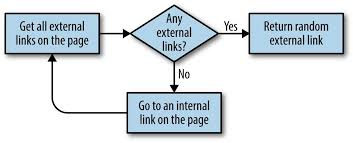

- The nice thing about breaking up tasks into simple functions such as "find all external links on this page" is that the code can later be easily refactored to perform a different crawling task. For example, if our goal is to crawl an entire site for external links, and make a note of each one, we can add the following function: 

In [ ]:
# Collects a list of all external URLs found on the site
allExtLinks = set()
allIntLinks = set()
def getAllExternalLinks(siteUrl):
    html = urlopen(siteUrl)
    bsObj = BeautifulSoup(html, "lxml")
    internalLinks = getInternalLinks(bsObj, splitAddress(siteUrl)[0])
    externalLinks = getExternalLinks(bsObj, splitAddress(siteUrl)[0])
    for link in externalLinks:
        if link not in allExtLinks:
            allExtLinks.add(link)
            print(link)
    for link in internalLinks:
        if link not in allIntLinks:
            print("About to get link: "+link)
            allIntLinks.add(link)
            getAllExternalLinks(link)
            
# getAllExternalLinks("http://oreilly.com")


> ## Handling Redirects
- Redirects allow the same web page to be viewable under different domain names. Redirects come in two flavors:
  - Server-side redirects, where the URL is changed before the page is loaded
  - Client-side redirects, sometimes seen with a "You will be directed in 10 seconds..." type of message, where the page loads before redirecting to the new one.

## Crawling with Scrapy

```bash
scrapy startproject wikiSpider
```

- scrapy.cfg
  - wikiSpider
    - \_\_init\_\_.py
    - items.py
    - pipelines.py
    - settings.py
    - spiders
      - \_\_init\_\_.py

In [ ]:
# items.py
from scrapy import Item, Field

class Article(Item):
    # define the fields for your item here like
    # name = scrapy.Field()
    title = Field()

- Each Scrapy Item object represents a single page on the website. Obviously, you can define as many fields as you'd like (url, content, header image, etc.), but I'm simply collecting the title field from each page, for now.

In [ ]:
# articleSpider.py in spiders
from scrapy.selector import Selector
from scrapy import Spider
from wikiSpider.items import Article

class ArticleSpider(Spider):
    name="article"
    allowed_domains = ["en.wikipedia.org"]
    start_urls = ["http://en.wikipedia.org/wiki/Main_Page",
                  "http://en.wikipedia.org/wiki/Python_%28programming_language%29"]
    
    def parse(self, response):
        item = Article()
        title = response.xpath('//h1/text()')[0].extract()
        print("Title is: " + title)
        item['title'] = title
        return item
    

p 45